
<h1>AirLine Sentimental Analysis</h1>

<h3>Library and Data</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier , AdaBoostClassifier 
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler , StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.over_sampling import SMOTE # Handling Imbalanced

from sklearn.pipeline import make_pipeline ,Pipeline
from wordcloud import WordCloud ,STOPWORDS
from termcolor import cprint
import re
import nltk
from nltk.corpus import stopwords



In [2]:
df=pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<h2>Data Cleaning</h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [43]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [44]:
df["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [45]:
round(df.isnull().sum()*100/len(df))

tweet_id                          0.0
airline_sentiment                 0.0
airline_sentiment_confidence      0.0
negativereason                   37.0
negativereason_confidence        28.0
airline                           0.0
airline_sentiment_gold          100.0
name                              0.0
negativereason_gold             100.0
retweet_count                     0.0
text                              0.0
tweet_coord                      93.0
tweet_created                     0.0
tweet_location                   32.0
user_timezone                    33.0
dtype: float64

In [46]:
df["negativereason"].fillna("None",inplace=True)

In [47]:
df["negativereason_confidence"].fillna(0,inplace=True)

In [48]:
df.drop(["airline_sentiment_gold","negativereason_gold","tweet_coord"],axis=1,inplace=True)

In [49]:
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.date
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [11]:
df.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                     0
negativereason_confidence          0
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

In [50]:
df["tweet_location"].fillna("None",inplace=True)
df["user_timezone"].fillna("None",inplace=True)


In [13]:
df.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

In [14]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,None,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,None,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,None,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,None,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,None,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,None,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,None,Pacific Time (US & Canada)


<h2>Data Visualization</h2>

<AxesSubplot: xlabel='airline_sentiment', ylabel='count'>

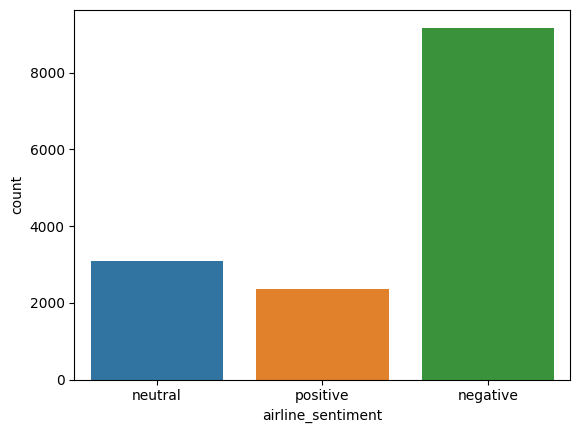

In [15]:
sns.countplot(data=df,x="airline_sentiment")

In [16]:
label=df["airline_sentiment"].unique()
values=df["airline_sentiment"].value_counts()
fig=go.Figure(data=[go.Pie(labels=label,values=values)])
fig.update_layout(width=700,height=500,title="Total Tweets for Each Sentiment")
fig.show()

In [17]:
air_att=df.groupby(["airline_sentiment","airline"]).apply(lambda x:x["airline"].count()).reset_index(name="Counts")
px.bar(air_att,x="airline",y="Counts" ,color="airline_sentiment")


In [18]:
count_airline=df["airline"].value_counts()
col_airline=df["airline"].unique()
fig=px.bar(count_airline,color=col_airline)
fig.update_layout(width=700,height=500,title='Total No. of Tweets of Airline')
fig.update_xaxes(title_text='Airline')
fig.update_yaxes(title_text='Number of Tweets')


Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


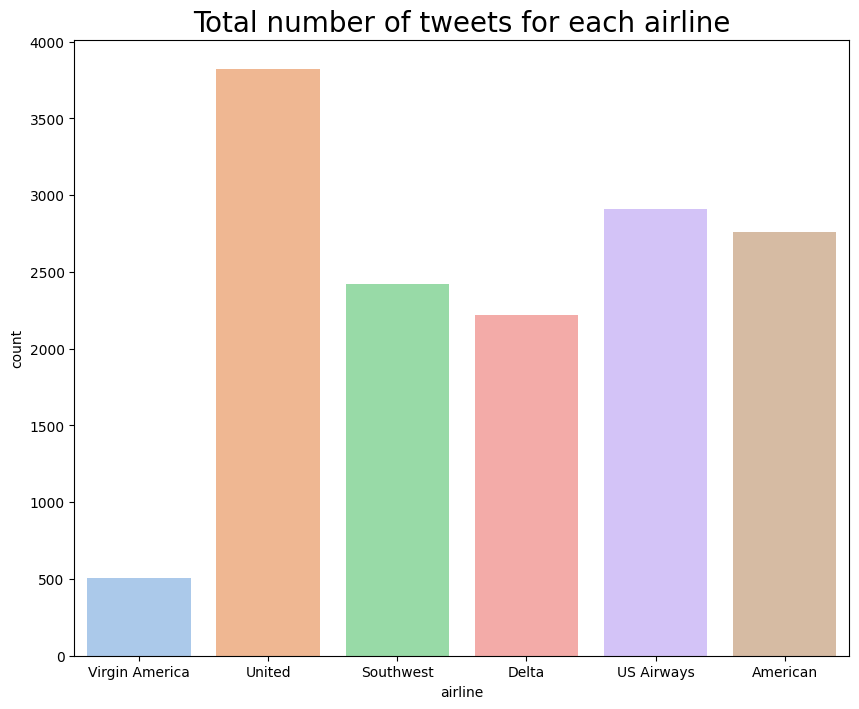

Total number of sentiment tweets for each airline :
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [19]:
cprint("Total number of tweets for each airline :",'green')
print(df.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()

cprint("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

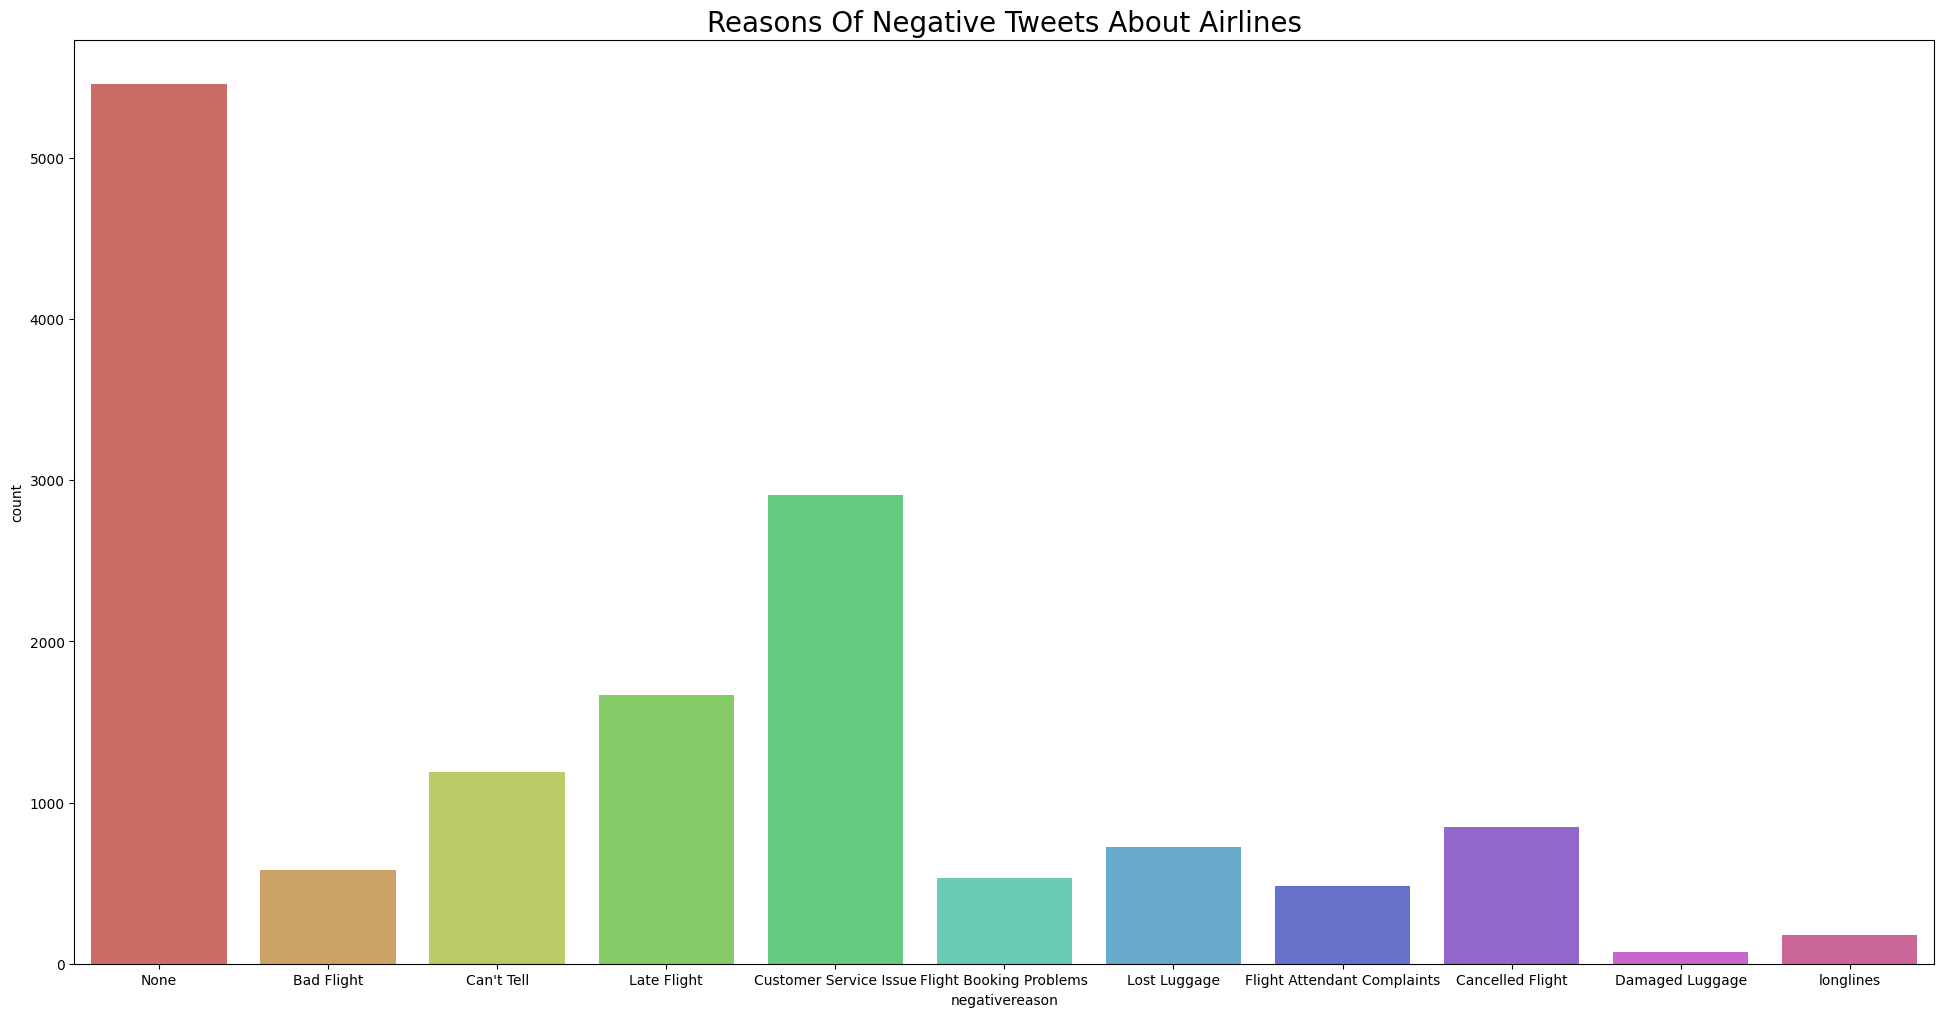

In [20]:
plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()


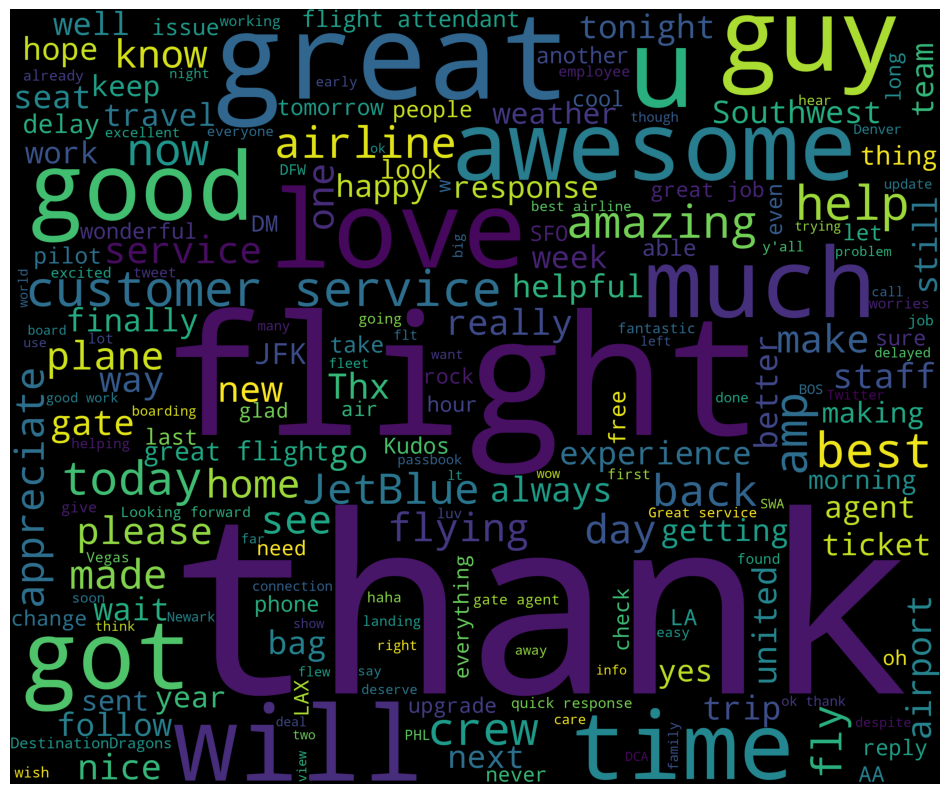

In [21]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

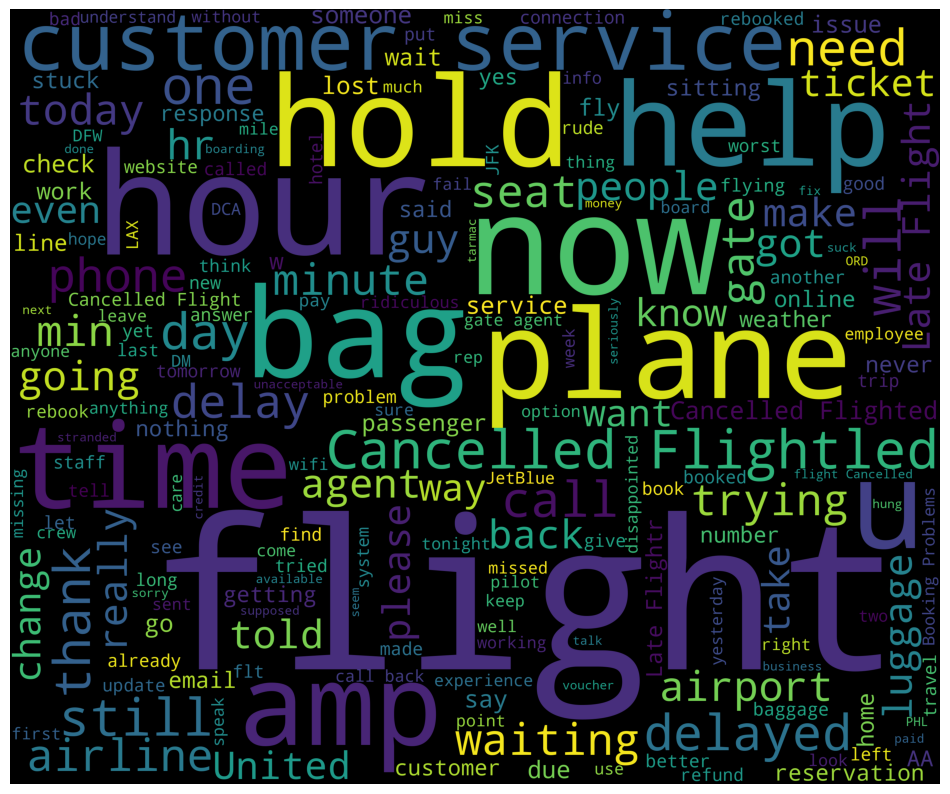

In [22]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word and not word.startswith('@') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',width=3000,height=2500).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# new_df=df[df['airline_sentiment']=='negative']
# words = ' '.join(new_df['text'])
# cleaned_word = " ".join([word for word in words.split()
#                             if 'http' not in word
#                                 and not word.startswith('@')
#                                 and word != 'RT'
#                             ])
# wordcloud = WordCloud(stopwords=STOPWORDS,
#                       background_color='black',
#                       width=3000,
#                       height=2500
#                      ).generate(cleaned_word)
# plt.figure(1,figsize=(12, 12))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

## Model Prediction

In [57]:
label=LabelEncoder()

df_label = df.apply(lambda x: label.fit_transform(x) if x.dtype == "object" and len(x.unique())<20 else x)


In [52]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  int32         
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                14640 non-null  int32         
 4   negativereason_confidence     14640 non-null  float64       
 5   airline                       14640 non-null  int32         
 6   name                          14640 non-null  object        
 7   retweet_count                 14640 non-null  int64         
 8   text                          14640 non-null  object        
 9   tweet_created                 14640 non-null  datetime64[ns]
 10  tweet_location                14640 non-null  object        
 11  user_timezone               

In [53]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))
nltk.download('stopwords')
df_label['tweet']=df_label['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
df_label.drop("tweet_id",axis=1,inplace=True)

In [112]:
X=df_label["text"]
y=df_label["airline_sentiment"]


In [113]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)


In [114]:

smote = SMOTE()
X,y = smote.fit_resample(X_final,y)


In [115]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)


In [116]:
model = SVC(kernel='linear', random_state = 10)
model.fit(X_train, y_train)
#predicting output for test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.9390338815960152
Accuracy Score on test data:  0.8829439535165234


In [117]:
xgb=XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42,
    max_depth=4,
    n_estimators=100,
    learning_rate=0.1
    
)
xgb.fit(X_train, y_train)
y_train_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.8201629222227987
Accuracy Score on test data:  0.8078925069604164


In [118]:
model=LogisticRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.9168266486794998
Accuracy Score on test data:  0.8689020699673163


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [120]:
model=AdaBoostClassifier()

model.fit(X_train, y_train)
#predicting output for test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.7509469205624448
Accuracy Score on test data:  0.7470039946737683


In [121]:
model=GradientBoostingClassifier()

model.fit(X_train, y_train)
#predicting output for test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.8101489129870804
Accuracy Score on test data:  0.7978452971795182


In [123]:
model=DecisionTreeClassifier()

model.fit(X_train, y_train)
#predicting output for test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.9984953043117314
Accuracy Score on test data:  0.7669773635153129


In [124]:
model=RandomForestClassifier()

model.fit(X_train, y_train)
#predicting output for test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.9984953043117314
Accuracy Score on test data:  0.9082435540491466
